# Project: Telecommunication Churning

In [2]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV



In [3]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

In [4]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

In [5]:
# read the excel data file 
df = pd.read_csv(r"C:\Users\Tast\Desktop\Practice\ML projects\New folder\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# display the top 5 rows of the dataframe
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dimensions of the data

In [6]:
# 'shape' function gives the total number of rows and columns in the data
df.shape

(7043, 21)

#  Data Analysis and Preparation

###  Understand the Dataset

In [7]:
# 'dtypes' gives the data type for each column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.loc[df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
df.dropna(how = 'any', inplace = True)

In [12]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [14]:
#drop the field 'customerID'
# axis=1: it stands for column
# inplace=True: it perform operations on original data
df.drop('customerID', axis=1, inplace=True)

In [15]:
#verify the shape
df.shape

(7032, 20)

### For convenience, we shall split the target variable from the data frame. Let dataframe 'df_target' be the dataframe containing the dependent variable and dataframe 'df_features' be the set of all independent variables.

In [16]:
# splitting features and the target variable
# consider all the columns except 'Churn' using 'iloc'
df_features = df.iloc[:, df.columns != 'Churn']

# consider the target variable
df_target = df.iloc[:, df.columns == 'Churn']

##  Statistical Summary

#### Here we take a look at the summary of each attribute. This includes the count, mean, the min and max values as well as some percentiles for numeric variables.

In [17]:
# data frame with numerical features
df_features.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [18]:
# data frame with categorical features
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of all categorical variables as tere are no numerical variables in the dataset
# use .transpose() for better readability, however its optional
df_features.describe(include='object').transpose()

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


## EDA

Check the distribution of all the variables

1. Distribution of numeric independent variables
2. Distribution of categoric independent variables
3. Distribution of dependent variable

#### Distribution of numeric independent variables

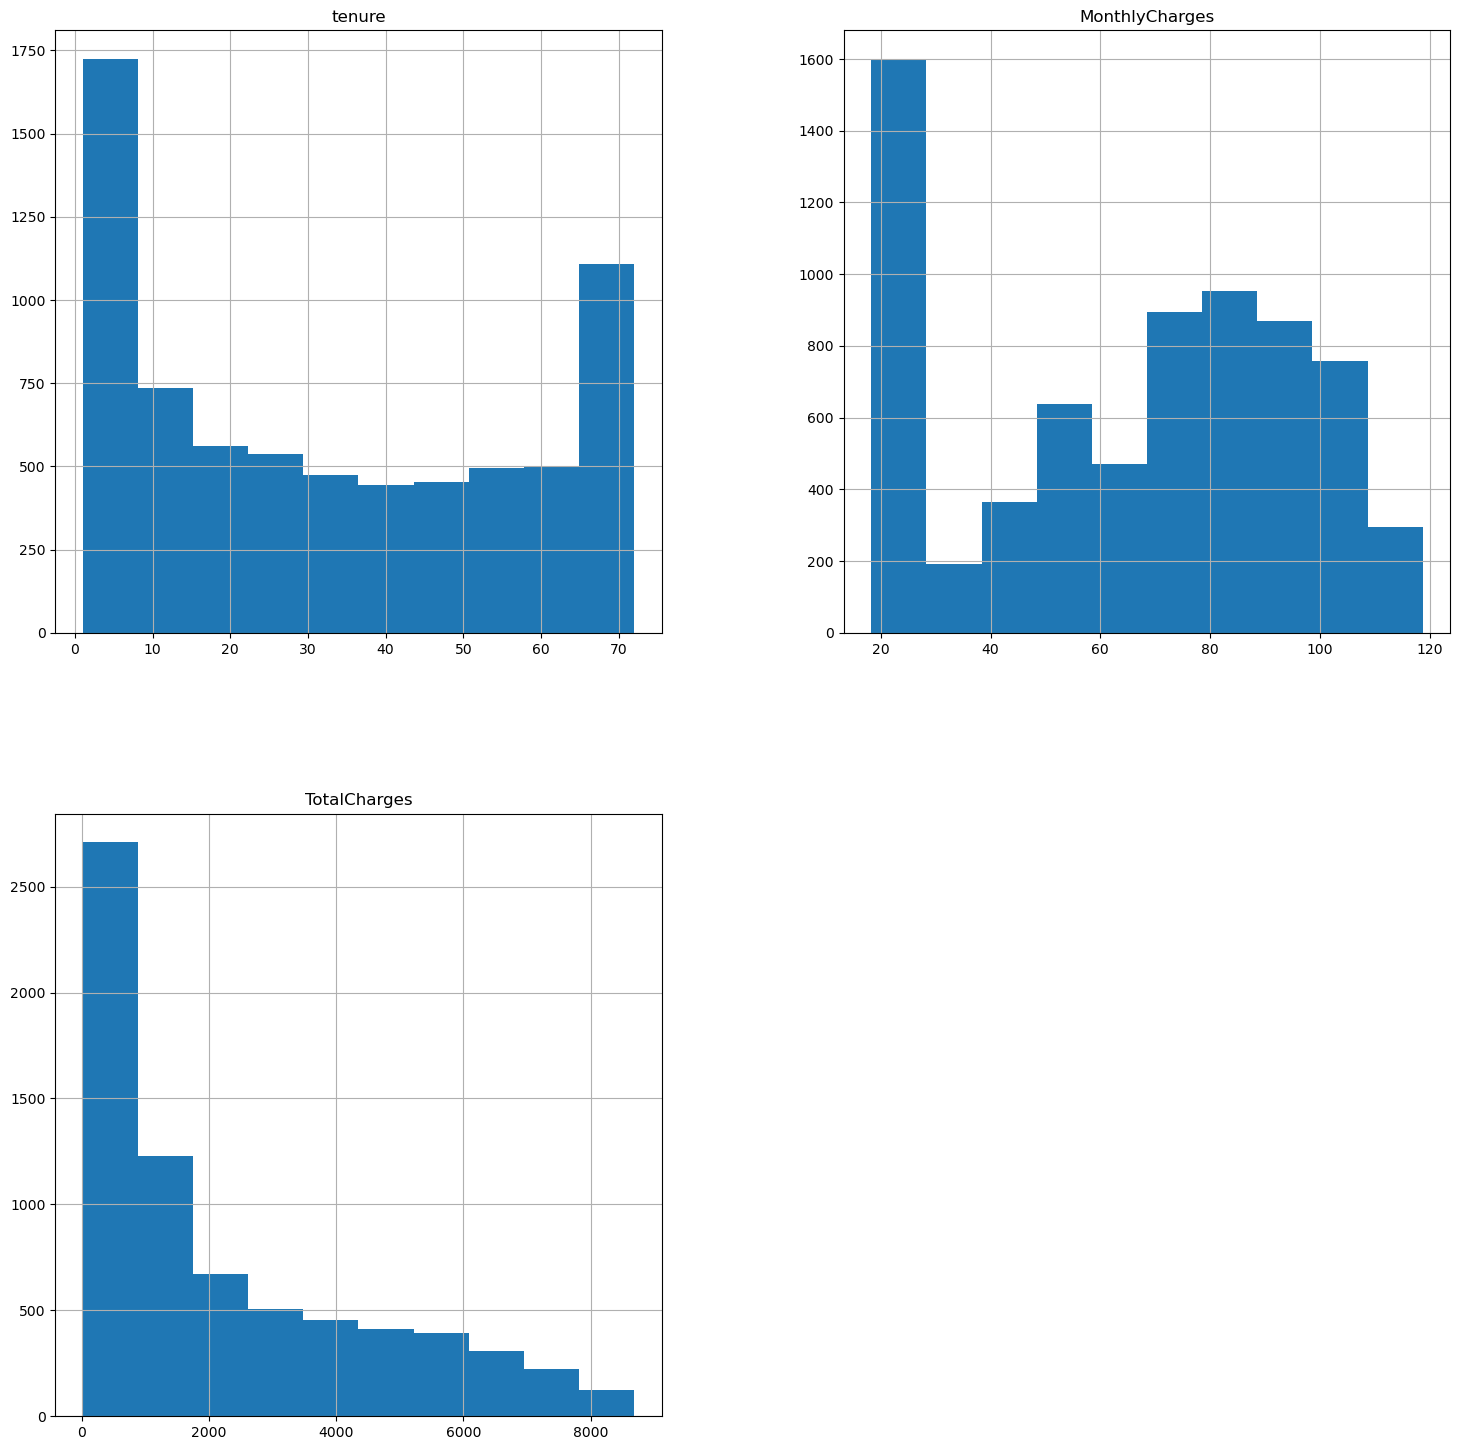

In [19]:
fig = df_features.hist(figsize = (18,18))

### Univariate Analysis

1. Tenure

<AxesSubplot:xlabel='tenure', ylabel='Density'>

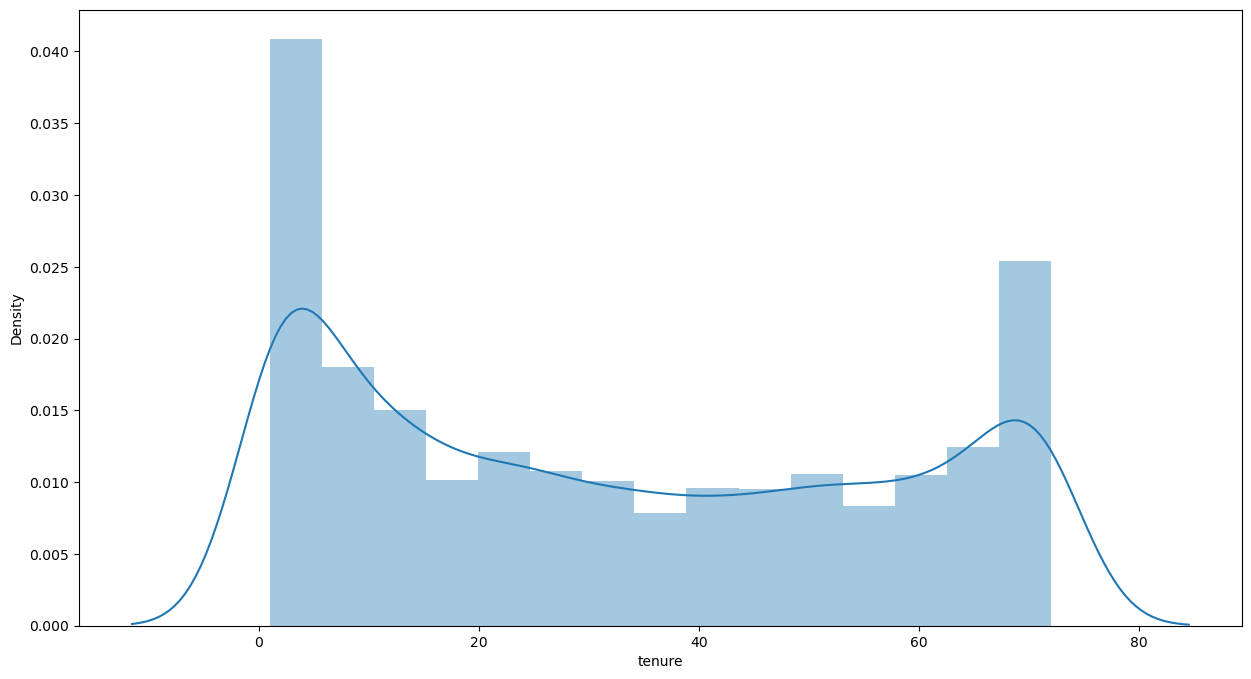

In [20]:
sns.distplot(df_features['tenure'])

2. Monthly Charges

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

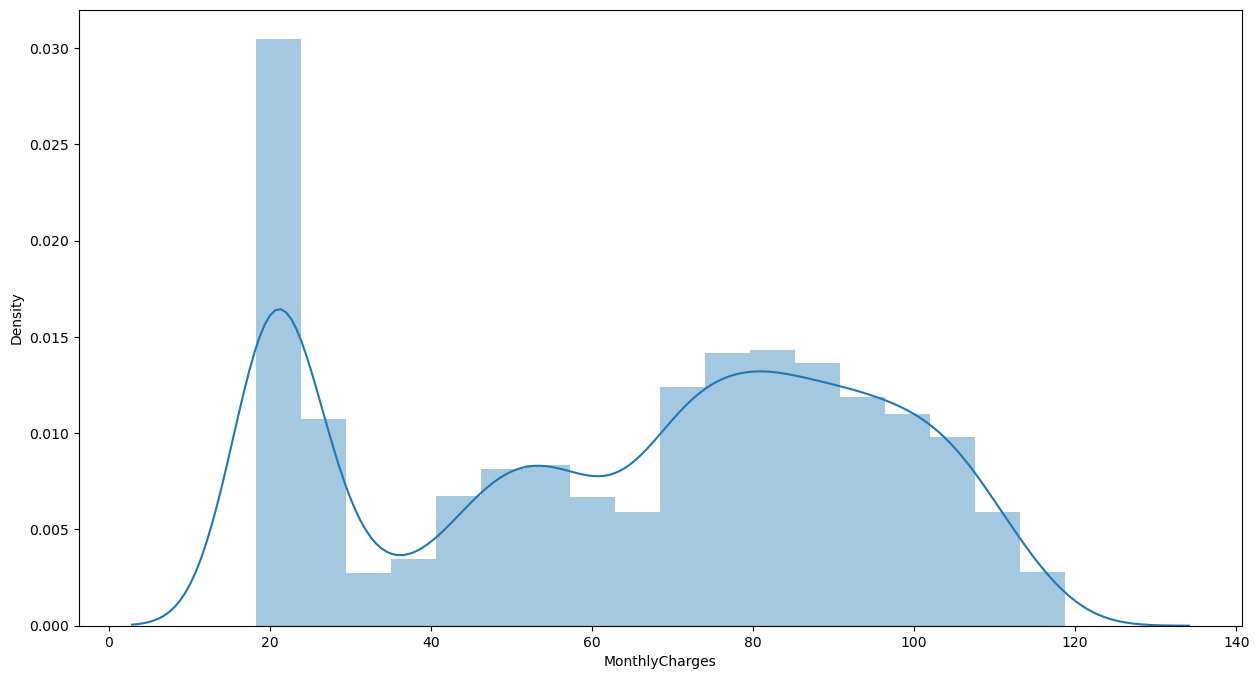

In [21]:
sns.distplot(df_features['MonthlyCharges'])

3. Total Charges

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

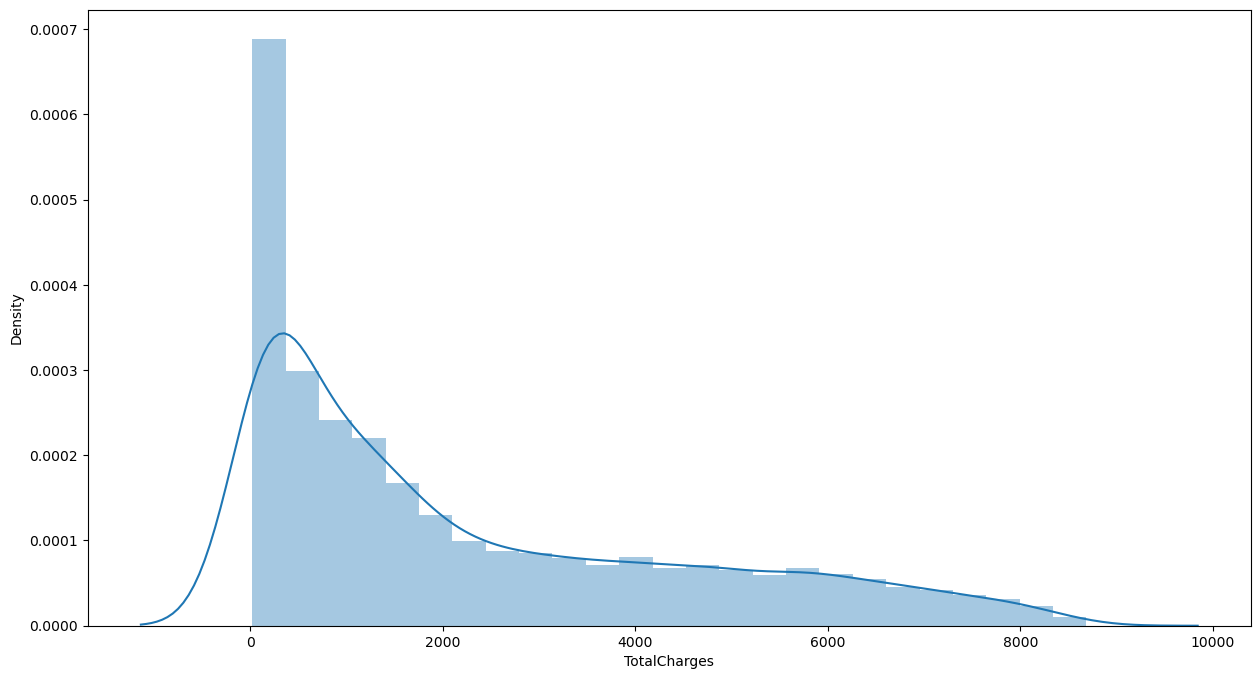

In [22]:
sns.distplot(df_features['TotalCharges'])

#### Distribution of categorical independent variables.

For the independent categoric variables, we plot the bar plot to check the distribution of each variables.

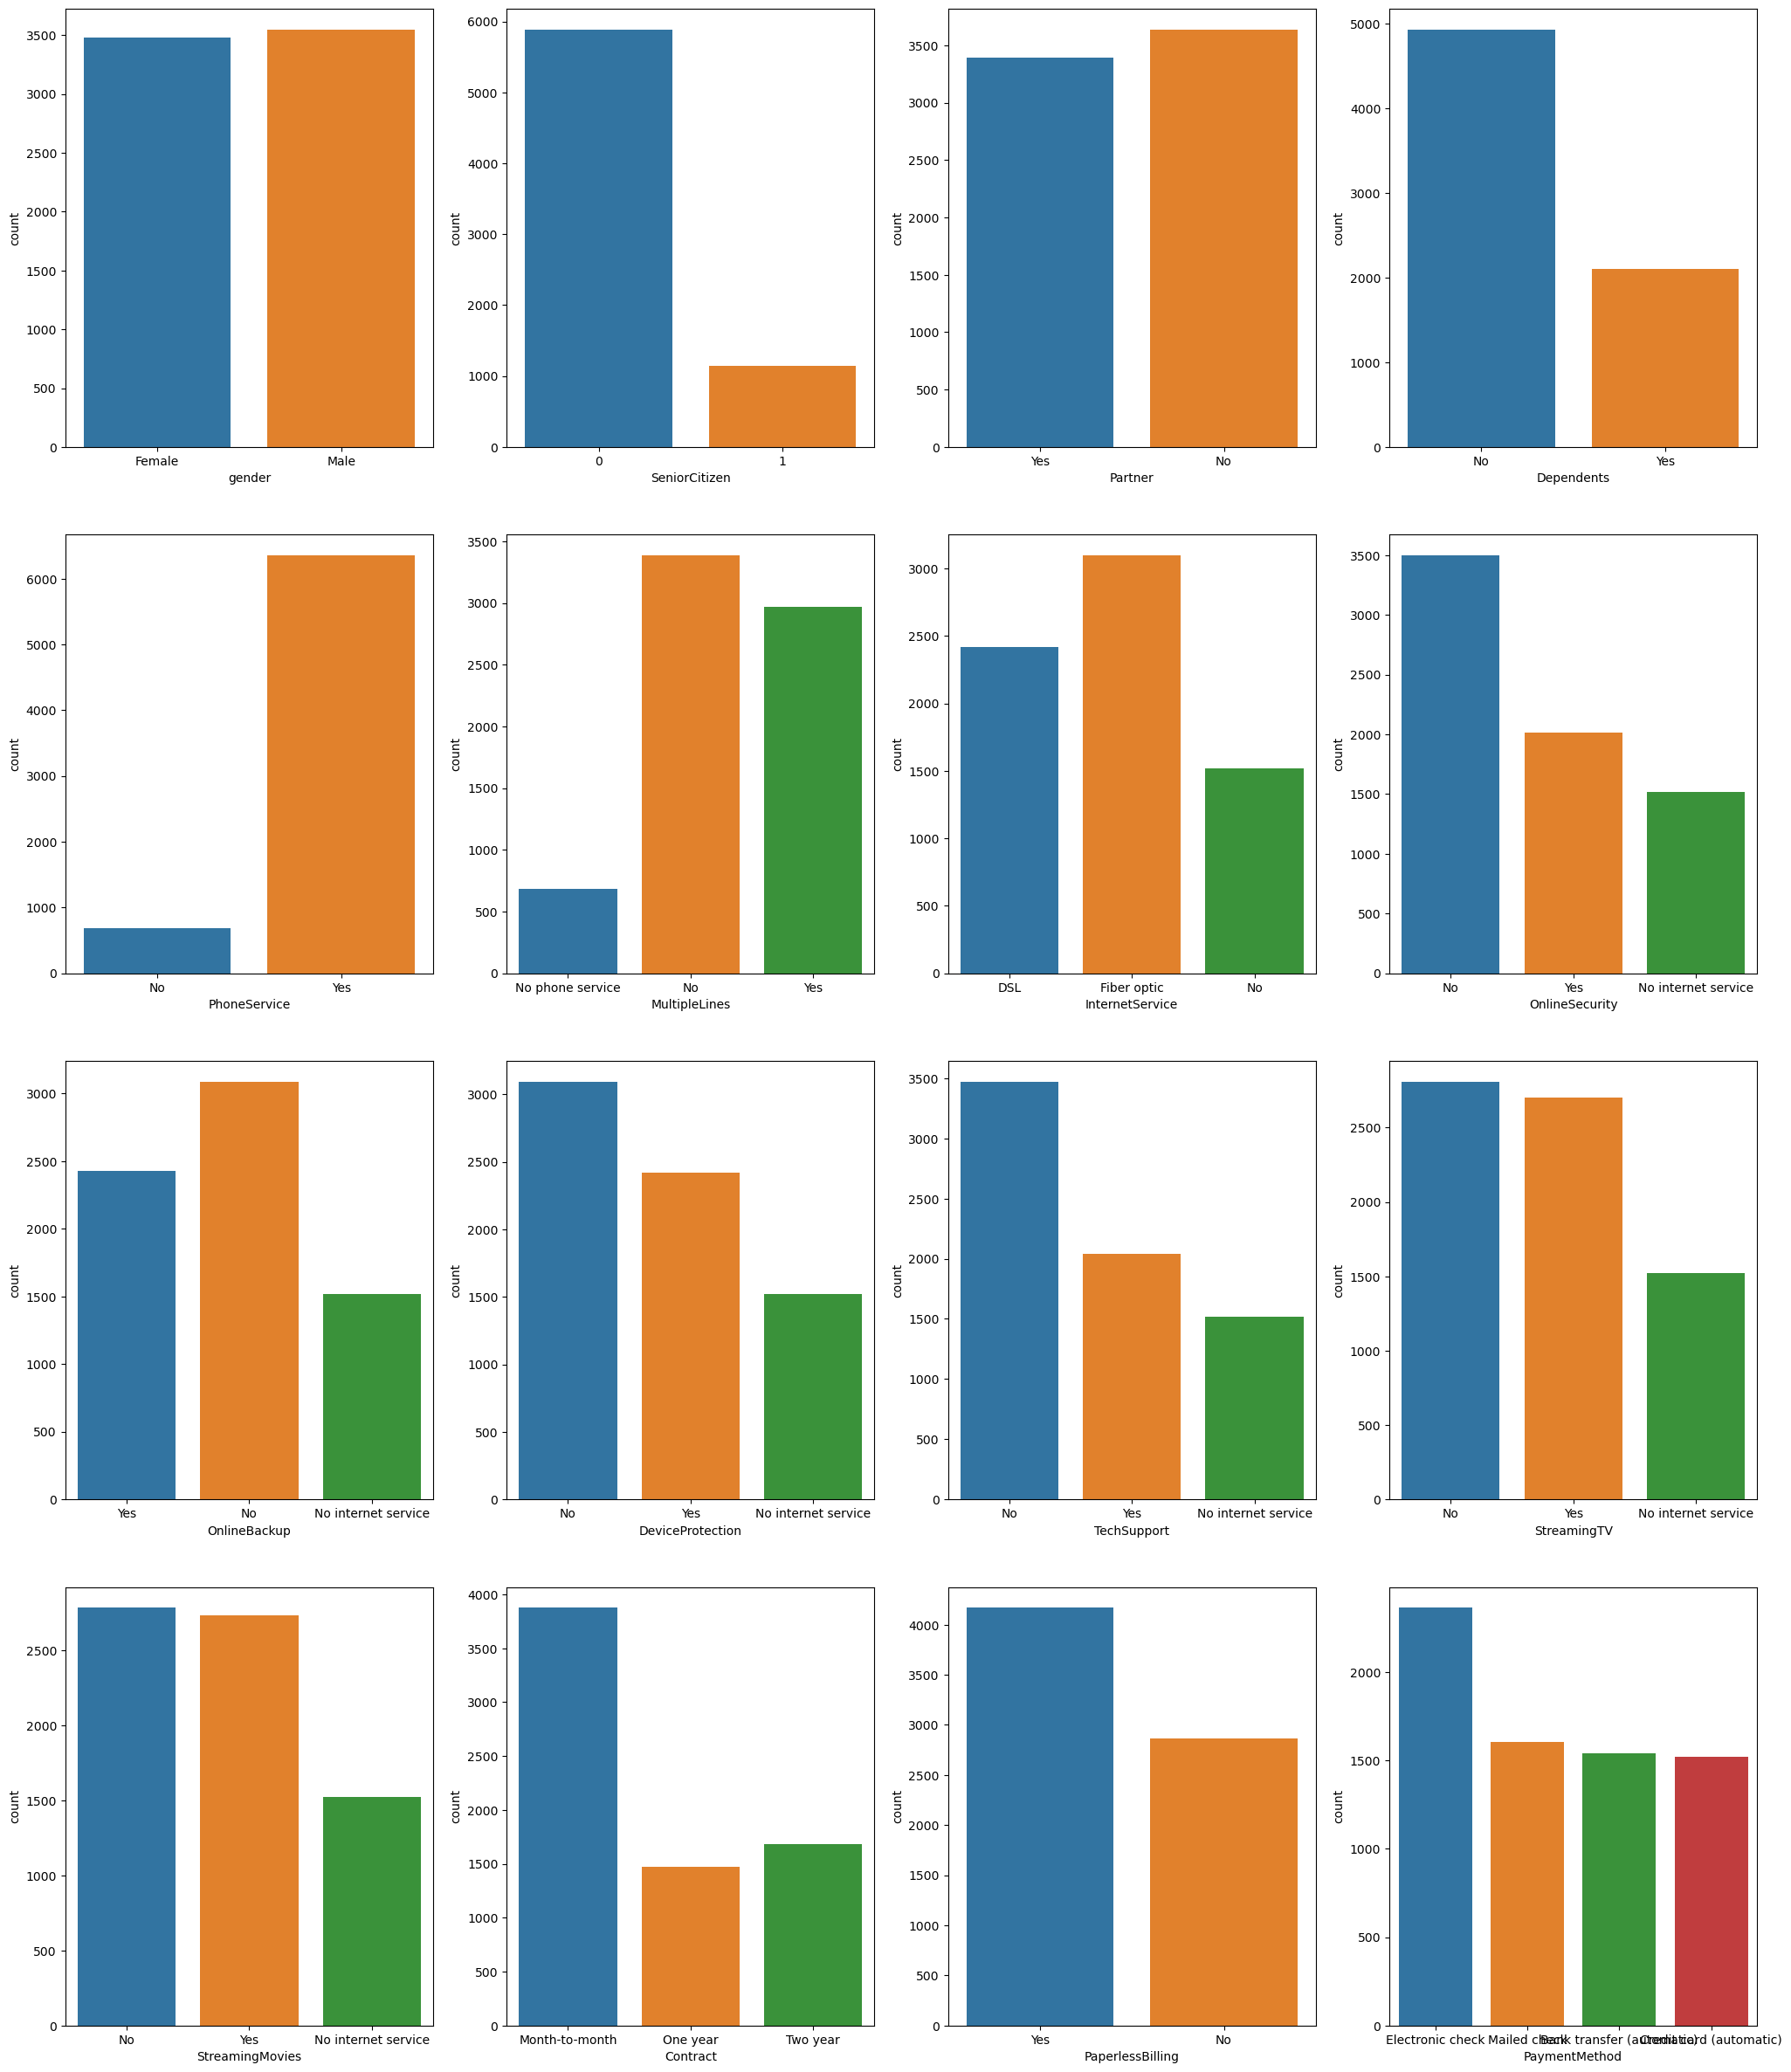

In [23]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df_features:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df_features[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize=(25, 30))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(df[variable], ax = subplot)

# display the plot
plt.show()

#### Distribution of dependent variable.

In [24]:
# get counts of yes and no in the 'Churn' variable using 'value_counts()'
# store the values in 'class_frequency'
class_frequency = df_target.Churn.value_counts()
class_frequency

No     5163
Yes    1869
Name: Churn, dtype: int64

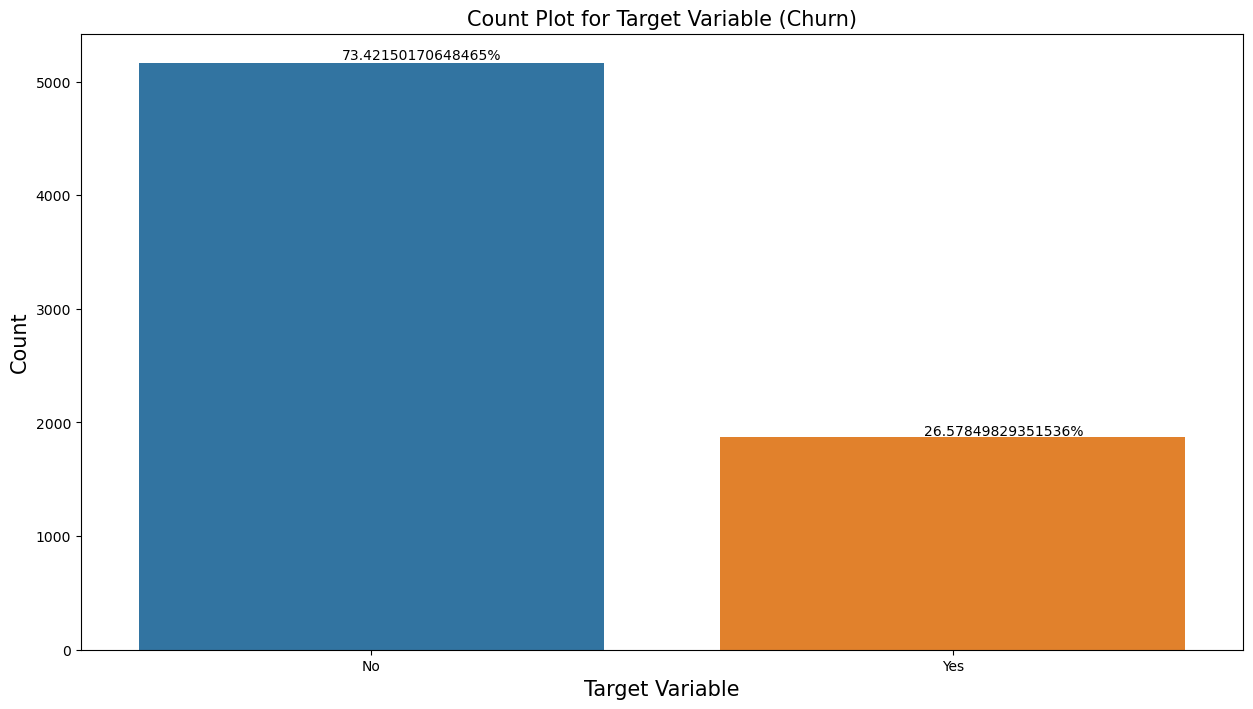

In [25]:
# plot the countplot of the variable 'Churn'
sns.countplot(x = df_target.Churn)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text on the plot
plt.text(x = -0.05, y = df_target.Churn.value_counts()[0] + 30, s = str((class_frequency[0])*100/len(df_target.Churn)) + '%')
plt.text(x = 0.95, y = df_target.Churn.value_counts()[1] +20, s = str((class_frequency[1])*100/len(df_target.Churn)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable (Churn)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

There are a total of 7032 customers,5163 who do not have churn, and 1869 have churn. We see that the data set is imbalanced between the two classes of the target variable.

### Correlation

Call the corr() function which will return the correlation matrix of numeric variables

In [26]:
corr = df_features.corr()
corr

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


<AxesSubplot:>

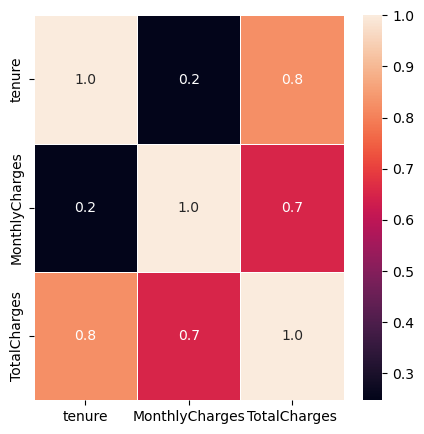

In [27]:
#correlation map
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df_features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

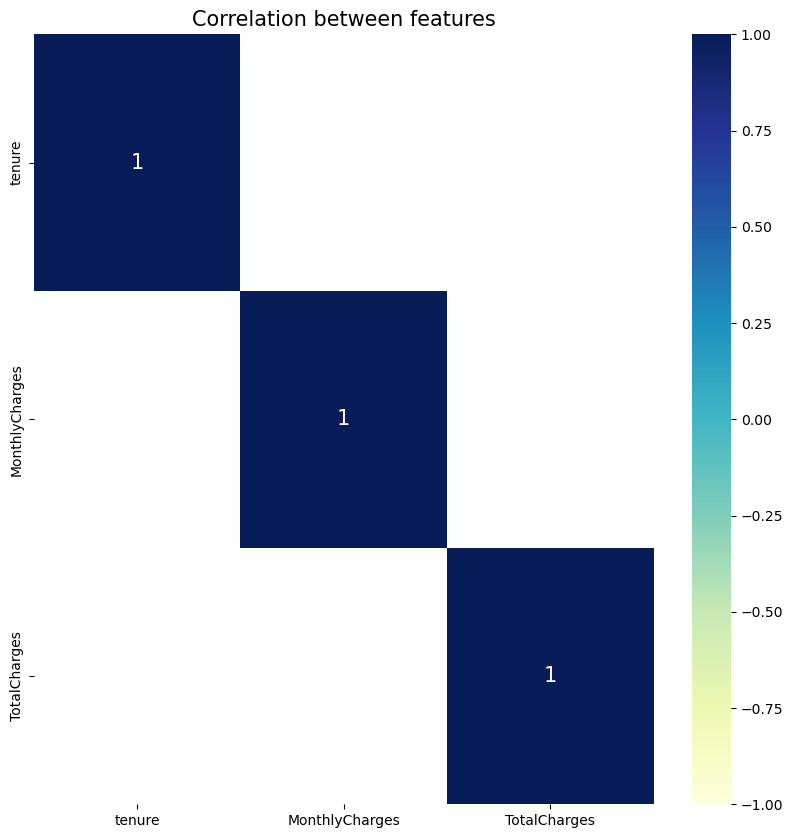

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], 
            cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 15})

plt.title('Correlation between features', fontsize=15)

plt.show()

### Missing values

In [29]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no missing values in the data

### Convert Categorical variables into dummies

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
## Convert target variable into numeric variable

df['Churn'] = np.where(df.Churn == 'Yes',1,0)

In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [35]:
df1=df.copy()

In [36]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [37]:
df_dummy=pd.get_dummies(df1,drop_first=True)

In [38]:
df_dummy.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [39]:
X = df_dummy.drop('Churn', axis=1)
y = pd.DataFrame(df_dummy['Churn'])

In [40]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [41]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


## Model Building

To build the Model we do the following:

1. Split the data into training and test sets
2. Build the model
3. Do predictions on the test set
4. Compute accuracy measures
5. Tabulate the results

In [42]:
df1.shape

(7032, 20)

##### Split the dataset into train and test sets

In [43]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (4922, 30)
y_train (4922, 1)
X_test (2110, 30)
y_test (2110, 1)


#### Feature Scaling

In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1) Random Forest 

#### Build model using RandomForestRegressor

In [45]:
# Import the necessary library for the classifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=10)

# Fit the classifier with the training dataset
rf_classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=10)

#### Predict the values using test set

In [46]:
# Predict the class labels on the test dataset using predict()
y_pred = rf_classifier.predict(X_test_scaled)

#### Compute accuracy measures

Now we calculate accuray measures Precision,Recall,F1_score

In [47]:
from sklearn import metrics

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Calculate precision, recall, and F1-score
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)


Accuracy: 0.790521327014218
Precision: 0.6242038216560509
Recall: 0.5259391771019678
F1 Score: 0.570873786407767


In [48]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],          # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]            # Minimum samples required to be a leaf node
}

# Create a random forest classifier
rf_classifier = RandomForestClassifier(random_state=10)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_rf_classifier.predict(X_test_scaled)
accuracy_best = metrics.accuracy_score(y_test, y_pred_best)
precision_best = metrics.precision_score(y_test, y_pred_best)
recall_best = metrics.recall_score(y_test, y_pred_best)
f1_score_best = metrics.f1_score(y_test, y_pred_best)

print('Accuracy (Best Model):', accuracy_best)
print('Precision (Best Model):', precision_best)
print('Recall (Best Model):', recall_best)
print('F1 Score (Best Model):', f1_score_best)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy (Best Model): 0.8042654028436019
Precision (Best Model): 0.658008658008658
Recall (Best Model): 0.5438282647584973
F1 Score (Best Model): 0.595494613124388


### 2) Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression classifier
logistic_reg = LogisticRegression(random_state=10)

# Fit the logistic regression classifier with the training dataset
logistic_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=10)

In [50]:
# Predict using the logistic regression model
y_pred_logistic = logistic_reg.predict(X_test_scaled)

In [51]:
# Evaluate the logistic regression model
accuracy_logistic = metrics.accuracy_score(y_test, y_pred_logistic)
precision_logistic = metrics.precision_score(y_test, y_pred_logistic)
recall_logistic = metrics.recall_score(y_test, y_pred_logistic)
f1_score_logistic = metrics.f1_score(y_test, y_pred_logistic)

print('Accuracy (Logistic Regression):', accuracy_logistic)
print('Precision (Logistic Regression):', precision_logistic)
print('Recall (Logistic Regression):', recall_logistic)
print('F1 Score (Logistic Regression):', f1_score_logistic)

Accuracy (Logistic Regression): 0.8071090047393364
Precision (Logistic Regression): 0.6544715447154471
Recall (Logistic Regression): 0.5760286225402504
F1 Score (Logistic Regression): 0.6127497621313035


In [52]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # List of C values to try
}

# Create the logistic regression classifier
logistic_reg = LogisticRegression(random_state=10)

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=logistic_reg,
    param_grid=param_grid,
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',
    n_jobs=-1
)

# Fit the grid search to your data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best logistic regression model
best_logistic_reg = grid_search.best_estimator_

# Evaluate the best model
y_pred_best_logistic = best_logistic_reg.predict(X_test_scaled)
accuracy_best_logistic = metrics.accuracy_score(y_test, y_pred_best_logistic)
precision_best_logistic = metrics.precision_score(y_test, y_pred_best_logistic)
recall_best_logistic = metrics.recall_score(y_test, y_pred_best_logistic)
f1_score_best_logistic = metrics.f1_score(y_test, y_pred_best_logistic)

print('Accuracy (Best Logistic Regression):', accuracy_best_logistic)
print('Precision (Best Logistic Regression):', precision_best_logistic)
print('Recall (Best Logistic Regression):', recall_best_logistic)
print('F1 Score (Best Logistic Regression):', f1_score_best_logistic)


Best Hyperparameters: {'C': 10}
Accuracy (Best Logistic Regression): 0.8085308056872038
Precision (Best Logistic Regression): 0.6597938144329897
Recall (Best Logistic Regression): 0.5724508050089445
F1 Score (Best Logistic Regression): 0.6130268199233716


### Conclusion

This project involved the evaluation and fine-tuning of two different machine learning models, Random Forest and Logistic Regression for a classification problem.
Both models performed reasonably well, with Logistic Regression exhibiting slightly higher accuracy and precision.